In [1]:
import pandas as pd
data = pd.read_csv('wavefiles.csv')
data

,file_name,classID,label
0,melody0.wav,1,antiviral
1,melody1.wav,1,antiviral
2,melody2.wav,1,antiviral
3,melody3.wav,1,antiviral
4,melody4.wav,1,antiviral
...,...,...,...
1698,melody1698.wav,4,anti-coronavirus
1699,melody1699.wav,4,anti-coronavirus
1700,melody1700.wav,4,anti-coronavirus
1701,melody1701.wav,4,anti-coronavirus


In [2]:
import librosa
filepath = "music-melodies/melody0.wav"
audio, sample_rate = librosa.load(filepath, res_type='kaiser_fast')

In [3]:
audio.shape

(374850,)

In [4]:
duration_of_audio = audio.shape[0] / sample_rate
duration_of_audio

17.0

In [5]:
audio

array([ 0.03047584,  0.12145267,  0.21048619, ..., -0.2772193 ,
       -0.268193  , -0.25148138], dtype=float32)

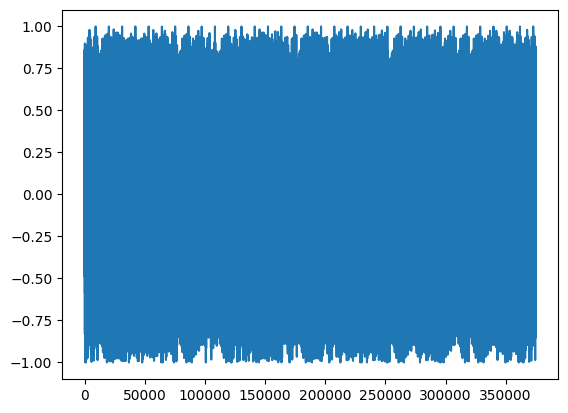

In [6]:
import matplotlib.pyplot as plt
plt.plot(audio)

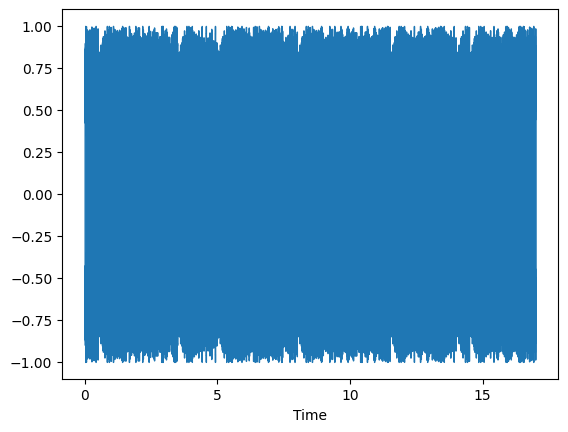

In [7]:
import librosa.display
librosa.display.waveshow(y=audio, sr=sample_rate)

In [8]:
import IPython.display
IPython.display.Audio(audio, rate=sample_rate)

In [9]:
sample_rate

22050

In [16]:
feature = librosa.feature.chroma_stft(y=audio, sr=sample_rate, hop_length=512)

In [17]:
feature

array([[3.24953526e-01, 1.61357507e-01, 1.33016154e-01, ...,
        1.33024037e-01, 1.56663090e-01, 3.40040326e-01],
       [5.83093800e-02, 7.46869622e-03, 9.63585800e-04, ...,
        9.62860417e-04, 6.88157231e-03, 7.59051219e-02],
       [2.31755581e-02, 3.08006955e-03, 7.04520906e-04, ...,
        7.04096339e-04, 3.96066345e-03, 4.09895740e-02],
       ...,
       [3.70160699e-01, 1.60366997e-01, 1.20648809e-01, ...,
        1.20654814e-01, 1.41748503e-01, 2.79717505e-01],
       [1.00000000e+00, 9.18021321e-01, 8.93766224e-01, ...,
        8.93752098e-01, 8.87647867e-01, 9.03749049e-01],
       [9.91641283e-01, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]], dtype=float32)

In [18]:
feature.shape

(12, 733)

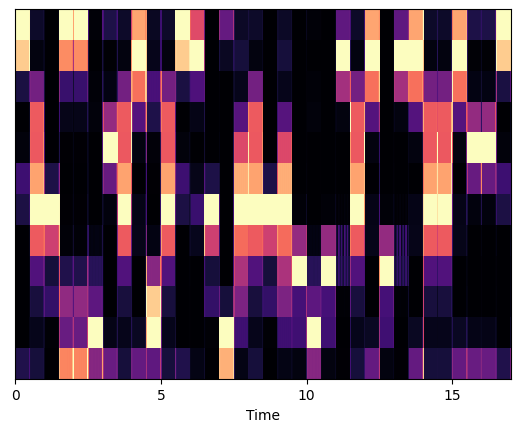

In [19]:
librosa.display.specshow(feature, sr=sample_rate, x_axis='time')

In [20]:
import sklearn.preprocessing

In [21]:
scaled_feature = sklearn.preprocessing.scale(feature, axis=1)

C:\Users\JVS Tanish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\JVS Tanish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


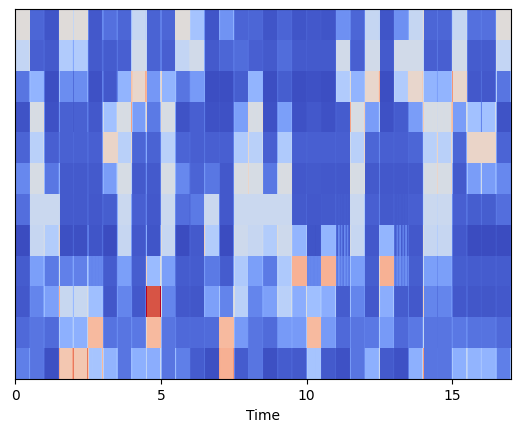

In [22]:
librosa.display.specshow(scaled_feature, sr=sample_rate, x_axis='time')

In [23]:
import numpy as np
np.mean(scaled_feature.T, axis=0).shape

(12,)

In [24]:
Directory = 'C:/Users/JVS Tanish/Downloads/MidMinorProject/music-melodies'

In [25]:
from tqdm import tqdm
import os

In [54]:
extracted_data = []
for index,row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(Directory),str(row["file_name"]))
    class_labels= row["label"]
    y,sr = librosa.load(file_name, res_type='kaiser_fast')
    feature = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=512)
    scaled_feature = np.mean(feature.T,axis=0)
    extracted_data.append([scaled_feature, class_labels])

1703it [23:15,  1.22it/s]


In [55]:
np.array(extracted_data, dtype=object).shape

(1703, 2)

In [56]:
feature_df = pd.DataFrame(extracted_data, columns=['feature','class'])

In [57]:
feature_df.head()

,feature,class
0,"[0.16790725, 0.18758614, 0.15751499, 0.2131490...",antiviral
1,"[0.16663393, 0.24981096, 0.1941788, 0.23838466...",antiviral
2,"[0.1732266, 0.21744053, 0.15809074, 0.21978213...",antiviral
3,"[0.15612791, 0.21832098, 0.17481606, 0.2411871...",antiviral
4,"[0.16832481, 0.18944383, 0.1877592, 0.22609723...",antiviral


In [58]:
feature_df['feature'].shape

(1703,)

In [59]:
feature_df['feature'][0][0]

0.16790725

In [60]:
feature_df['feature'][0]

array([0.16790725, 0.18758614, 0.15751499, 0.21314904, 0.21564156,
       0.45238283, 0.14985102, 0.16681848, 0.14896332, 0.18335605,
       0.39669707, 0.183643  ], dtype=float32)

In [61]:
feature_df['feature'][0].shape

(12,)

In [62]:
x = np.array(feature_df['feature'].tolist())

In [63]:
x.shape

(1703, 12)

In [64]:
x[0]

array([0.16790725, 0.18758614, 0.15751499, 0.21314904, 0.21564156,
       0.45238283, 0.14985102, 0.16681848, 0.14896332, 0.18335605,
       0.39669707, 0.183643  ], dtype=float32)

In [65]:
x[0][0]

0.16790725

In [66]:
target = np.array(feature_df['class'].tolist())

In [67]:
target

array(['antiviral', 'antiviral', 'antiviral', ..., 'anti-coronavirus',
       'anti-coronavirus', 'anti-coronavirus'], dtype='<U24')

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
y_new = pd.get_dummies(target)
y_new.shape

(1703, 4)

In [70]:
y_new.head()

,anti-coronavirus,antiviral,exp-non-antiviral,random-seq-non-antiviral
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y_new, test_size=0.2, random_state=11, shuffle=True)

In [72]:
x_train.shape, x_test.shape

((1362, 12), (341, 12))

In [73]:
x_train[0].shape

(12,)

In [74]:
np.array(x_train).reshape(1362,1,12)

array([[[0.21434599, 0.26455098, 0.13306303, ..., 0.14034395,
         0.5007832 , 0.18625842]],

       [[0.36673862, 0.33869442, 0.2589308 , ..., 0.10750253,
         0.24889   , 0.21015942]],

       [[0.18497491, 0.24030353, 0.31163502, ..., 0.2629209 ,
         0.45341042, 0.11741259]],

       ...,

       [[0.17607068, 0.32577872, 0.41690654, ..., 0.12618735,
         0.17309617, 0.32687122]],

       [[0.1523846 , 0.31995466, 0.3617694 , ..., 0.09673747,
         0.22123821, 0.21920514]],

       [[0.1577692 , 0.29627872, 0.2913104 , ..., 0.12163235,
         0.20259532, 0.2073407 ]]], dtype=float32)

In [75]:
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Flatten, Dropout
from keras.models import Sequential
import keras
import tensorflow as tf
from tensorflow.keras import Input, Model

In [76]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,12)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True, recurrent_dropout=0.1)))
model.add(Flatten())
# model.add(Dense(256, activation='sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(90, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 1, 200)           90400     
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 804       
                                                                 
Total params: 91,204
Trainable params: 91,204
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
from keras.callbacks import ReduceLROnPlateau

In [80]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5,min_lr=0.0001)

In [81]:
history = model.fit(np.array(x_train).reshape(1362,1,12), np.array(y_train), epochs=200, validation_data=(np.array(x_test).reshape(341,1,12),np.array(y_test)), batch_size=32, callbacks=[learning_rate_reduction])

Epoch 1/200
43/43 [==============================] - 9s 33ms/step - loss: 1.3236 - accuracy: 0.3554 - val_loss: 1.2864 - val_accuracy: 0.3431 - lr: 0.0010
Epoch 2/200
43/43 [==============================] - 0s 9ms/step - loss: 1.2555 - accuracy: 0.3664 - val_loss: 1.2729 - val_accuracy: 0.3460 - lr: 0.0010
Epoch 3/200
43/43 [==============================] - 0s 8ms/step - loss: 1.2444 - accuracy: 0.4317 - val_loss: 1.2695 - val_accuracy: 0.3783 - lr: 0.0010
Epoch 4/200
43/43 [==============================] - 0s 8ms/step - loss: 1.2389 - accuracy: 0.4236 - val_loss: 1.2640 - val_accuracy: 0.4194 - lr: 0.0010
Epoch 5/200
43/43 [==============================] - 0s 9ms/step - loss: 1.2305 - accuracy: 0.4442 - val_loss: 1.2582 - val_accuracy: 0.4340 - lr: 0.0010
Epoch 6/200
43/43 [==============================] - 0s 8ms/step - loss: 1.2214 - accuracy: 0.4648 - val_loss: 1.2533 - val_accuracy: 0.4106 - lr: 0.0010
Epoch 7/200
43/43 [==============================] - 0s 9ms/step - loss: 1.

Epoch 49/200
43/43 [==============================] - 0s 9ms/step - loss: 1.1455 - accuracy: 0.4949 - val_loss: 1.2179 - val_accuracy: 0.4223 - lr: 1.0000e-04
Epoch 50/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1451 - accuracy: 0.4956 - val_loss: 1.2184 - val_accuracy: 0.4223 - lr: 1.0000e-04
Epoch 51/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1450 - accuracy: 0.4956 - val_loss: 1.2180 - val_accuracy: 0.4223 - lr: 1.0000e-04
Epoch 52/200
43/43 [==============================] - 0s 9ms/step - loss: 1.1447 - accuracy: 0.4963 - val_loss: 1.2186 - val_accuracy: 0.4223 - lr: 1.0000e-04
Epoch 53/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1447 - accuracy: 0.4956 - val_loss: 1.2180 - val_accuracy: 0.4223 - lr: 1.0000e-04
Epoch 54/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1445 - accuracy: 0.4941 - val_loss: 1.2183 - val_accuracy: 0.4223 - lr: 1.0000e-04
Epoch 55/200
43/43 [==========================

43/43 [==============================] - 0s 8ms/step - loss: 1.1393 - accuracy: 0.4993 - val_loss: 1.2148 - val_accuracy: 0.4252 - lr: 1.0000e-04
Epoch 101/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1392 - accuracy: 0.4985 - val_loss: 1.2152 - val_accuracy: 0.4252 - lr: 1.0000e-04
Epoch 102/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1391 - accuracy: 0.5051 - val_loss: 1.2156 - val_accuracy: 0.4223 - lr: 1.0000e-04
Epoch 103/200
43/43 [==============================] - 0s 9ms/step - loss: 1.1386 - accuracy: 0.5000 - val_loss: 1.2159 - val_accuracy: 0.4194 - lr: 1.0000e-04
Epoch 104/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1386 - accuracy: 0.5007 - val_loss: 1.2148 - val_accuracy: 0.4252 - lr: 1.0000e-04
Epoch 105/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1383 - accuracy: 0.5037 - val_loss: 1.2150 - val_accuracy: 0.4252 - lr: 1.0000e-04
Epoch 106/200
43/43 [==============================] -

43/43 [==============================] - 0s 8ms/step - loss: 1.1344 - accuracy: 0.5000 - val_loss: 1.2122 - val_accuracy: 0.4252 - lr: 1.0000e-04
Epoch 152/200
43/43 [==============================] - 0s 9ms/step - loss: 1.1342 - accuracy: 0.5015 - val_loss: 1.2113 - val_accuracy: 0.4223 - lr: 1.0000e-04
Epoch 153/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1343 - accuracy: 0.4978 - val_loss: 1.2122 - val_accuracy: 0.4252 - lr: 1.0000e-04
Epoch 154/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1338 - accuracy: 0.5007 - val_loss: 1.2118 - val_accuracy: 0.4223 - lr: 1.0000e-04
Epoch 155/200
43/43 [==============================] - 0s 9ms/step - loss: 1.1339 - accuracy: 0.5022 - val_loss: 1.2118 - val_accuracy: 0.4252 - lr: 1.0000e-04
Epoch 156/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1340 - accuracy: 0.5000 - val_loss: 1.2111 - val_accuracy: 0.4252 - lr: 1.0000e-04
Epoch 157/200
43/43 [==============================] -

Text(0, 0.5, 'Accuracy')

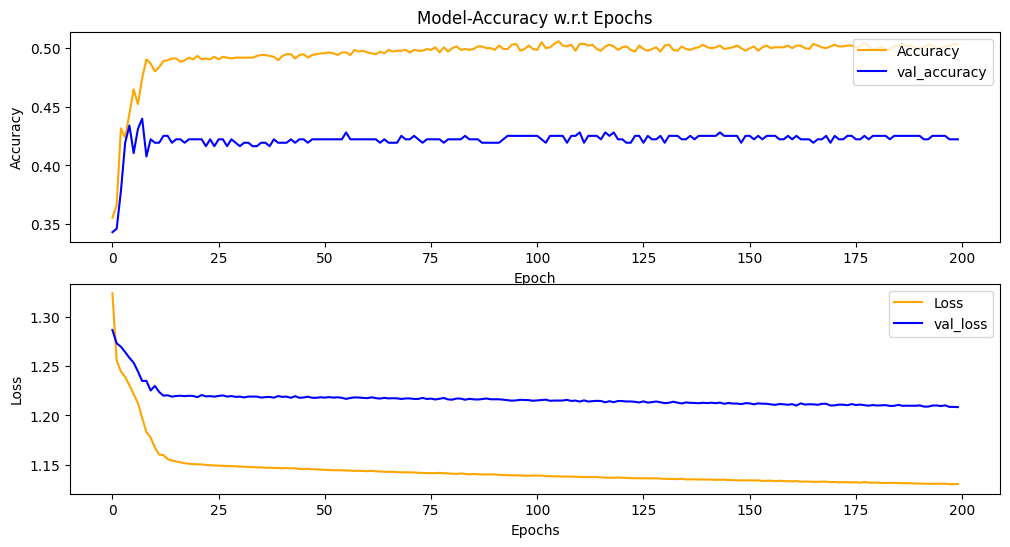

In [82]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))
ax2.plot(history.history['loss'], color='orange', label='Loss')
ax2.plot(history.history['val_loss'], color='blue', label='val_loss')
ax2.legend(loc='upper right')
ax1.plot(history.history['accuracy'], label='Accuracy', color='orange')
ax1.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
ax1.legend(loc="upper right")
ax1.set_title("Model-Accuracy w.r.t Epochs", loc='center')
plt.xlabel("Epochs")
plt.ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")

In [172]:
y_pred = model.predict(np.array(x_test).reshape(341, 1,50))

11/11 [==============================] - 0s 3ms/step


In [173]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [174]:
y_pred_classes

array([1, 3, 3, 3, 1, 1, 3, 1, 2, 1, 1, 1, 2, 3, 3, 1, 2, 3, 2, 3, 3, 3,
       1, 2, 1, 3, 1, 3, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 3,
       3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 2, 3,
       1, 2, 1, 1, 3, 2, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1,
       0, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2,
       3, 3, 2, 2, 3, 3, 1, 1, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 1, 3, 1, 1,
       3, 1, 3, 1, 1, 3, 3, 1, 3, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 1, 0, 3,
       1, 3, 2, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 3,
       3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3,
       3, 2, 3, 1, 2, 3, 3, 1, 3, 1, 3, 3, 2, 1, 3, 3, 1, 1, 3, 3, 3, 2,
       2, 3, 3, 1, 3, 2, 2, 1, 3, 1, 3, 1, 3, 3, 3, 2, 3, 1, 3, 3, 1, 1,
       3, 3, 2, 3, 1, 1, 1, 3, 2, 1, 3, 3, 3, 2, 3, 2, 3, 1, 2, 3, 3, 3,
       2, 1, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,

In [175]:
y_true = np.argmax(np.array(y_test), axis=1)

In [176]:
y_true

array([1, 3, 3, 3, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 3, 1, 3, 2, 3,
       1, 3, 2, 3, 1, 3, 3, 2, 3, 2, 1, 2, 0, 0, 3, 1, 2, 1, 2, 1, 2, 3,
       3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2, 3, 2, 2,
       2, 2, 1, 1, 3, 3, 1, 1, 3, 1, 0, 3, 1, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       1, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 3, 0, 1, 2, 2, 1,
       1, 0, 2, 3, 1, 3, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 3, 0, 1, 2, 2, 1,
       3, 1, 2, 2, 0, 3, 0, 2, 3, 2, 2, 1, 3, 1, 3, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 3, 2, 1, 2, 3, 3, 1, 3, 1, 2, 3, 3, 3, 2, 1, 0, 2, 3, 1, 3,
       1, 3, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 3,
       1, 3, 3, 2, 0, 2, 3, 1, 3, 3, 3, 0, 3, 3, 1, 1, 3, 3, 1, 2, 1, 3,
       3, 2, 2, 1, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 3, 1, 1, 0, 3, 2, 3, 1,
       1, 3, 2, 1, 1, 2, 2, 1, 3, 1, 3, 2, 3, 0, 2, 2, 3, 1, 3, 2, 1, 1,
       3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 2, 3, 3, 1, 2, 0, 3, 1, 2, 2, 2, 3,
       2, 1, 3, 3, 2, 0, 3, 3, 0, 3, 3, 3, 2, 3, 1,

In [177]:
np.mean(y_pred_classes == y_true)

0.6217008797653959

Text(0.5, 21.34715460257995, 'Predicted Label')

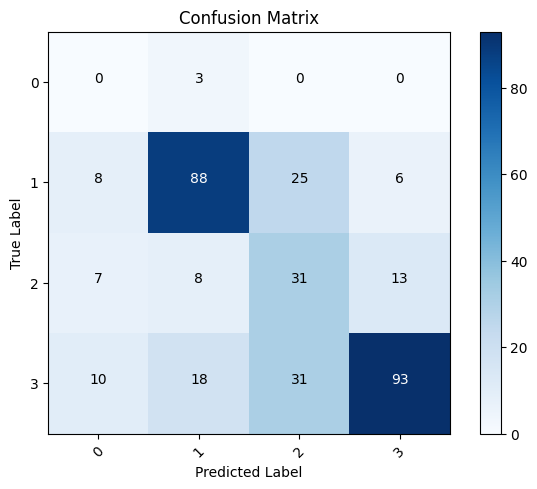

In [178]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_classes, y_true)
import itertools
plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(4)))
plt.xticks(tick_marks, range(4), rotation=45)
plt.yticks(tick_marks, range(4))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [ ]:
 model.save('saved_models/RNN_model')